# Project: Real-time Stock Market Analysis and Risk Assesment

In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from iex
from pandas_datareader import DataReader

# For time stamps
from datetime import datetime

# For division
from __future__ import division

## Basic Analysis of Stock Information


In this section I'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.


In [2]:
# List of Tech_stocks for analytics
tech_list = ['APOLLOTYRE.NS', 'GLENMARK.NS', 'AARTIDRUGS.NS', 'ADANIGREEN.NS', 'RAMCOSYS.NS']

# set up Start and End time for data grab
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

#For-loop for grabing google finance data and setting as a dataframe
# Set DataFrame as the Stock Ticker

## Glenmark, Ramko Systems, Adani Green, "MSEs"
## 


for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)
    globals()[stock].dropna(axis = 0, how = 'any', inplace = True)

In [3]:
globals()['APOLLOTYRE.NS']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-29,190.100006,181.199997,181.500000,186.850006,3239605.0,182.895508
2019-10-30,188.500000,184.449997,187.750000,187.800003,1410885.0,183.825409
2019-10-31,194.399994,189.100006,190.300003,190.300003,4163472.0,186.272491
2019-11-01,196.750000,188.100006,191.399994,189.199997,4995111.0,185.195770
2019-11-04,190.649994,184.800003,189.750000,185.550003,2125782.0,181.623016
...,...,...,...,...,...,...
2020-10-22,143.500000,138.399994,141.800003,141.199997,13366846.0,141.199997
2020-10-23,151.000000,141.050003,142.050003,149.800003,20075196.0,149.800003
2020-10-26,150.449997,144.350006,149.449997,148.000000,8372475.0,148.000000


In [4]:
# globals()['APOLLOTYRE.NS'].to_csv('apollotyres_5_years.csv')

In [5]:
# globals()['ADANIGREEN'].to_csv('adanigreean_10_years.csv')

In [6]:
globals()['APOLLOTYRE.NS'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-29,190.100006,181.199997,181.500000,186.850006,3239605.0,182.895508
2019-10-30,188.500000,184.449997,187.750000,187.800003,1410885.0,183.825409
2019-10-31,194.399994,189.100006,190.300003,190.300003,4163472.0,186.272491
2019-11-01,196.750000,188.100006,191.399994,189.199997,4995111.0,185.195770
2019-11-04,190.649994,184.800003,189.750000,185.550003,2125782.0,181.623016


In [7]:
# Summery stats for Apple Stock
globals()['APOLLOTYRE.NS'].describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,133.319123,128.144821,130.914741,130.522510,6.273587e+06,129.287350
std,30.642958,30.775924,30.832637,30.605172,4.566351e+06,29.138476
min,79.500000,73.400002,75.000000,76.449997,6.248720e+05,76.449997
25%,109.625000,105.175003,106.899998,106.674999,2.810894e+06,106.674999
50%,130.149994,125.349998,127.550003,128.199997,5.251751e+06,128.199997
75%,165.274994,161.550003,163.674995,163.225006,8.647421e+06,159.770515
max,196.750000,189.100006,191.399994,190.300003,3.275959e+07,186.272491


In [8]:
# General Info
globals()['APOLLOTYRE.NS'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2019-10-29 to 2020-10-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


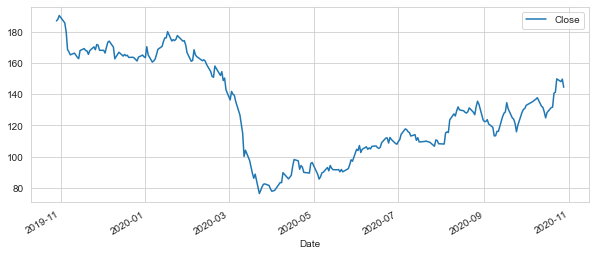

In [9]:
# Let's see a historical view of the closing price
globals()['APOLLOTYRE.NS']['Close'].plot(legend=True, figsize=(10,4))

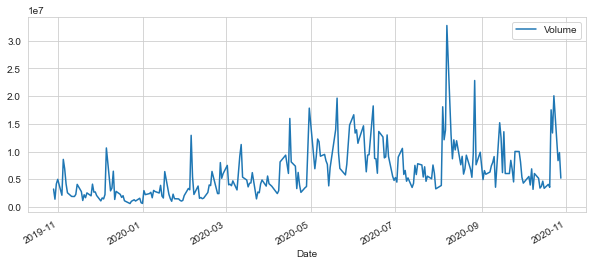

In [10]:
# Now let's plot the total volume of stock being traded each day over the past year

globals()['APOLLOTYRE.NS']['Volume'].plot(legend=True, figsize=(10,4))

In [11]:
# Pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages
MA_day = [10,20,50,100]

for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    globals()['APOLLOTYRE.NS'][column_name] = globals()['APOLLOTYRE.NS']['Close'].rolling(ma).mean()

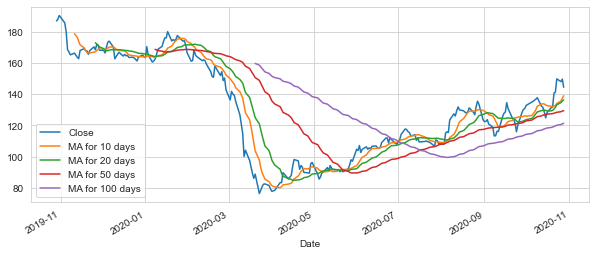

In [12]:
globals()['APOLLOTYRE.NS'][['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

## Daily Return Analysis


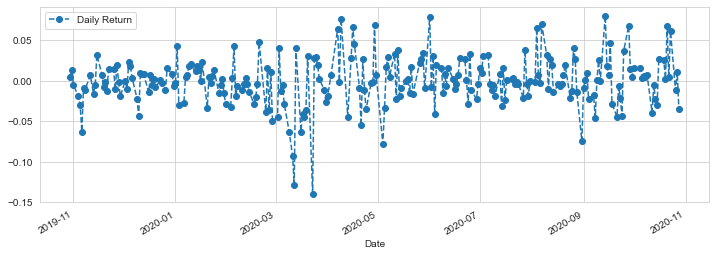

In [13]:
# We'll use pct_change to find the percent change for each day
globals()['APOLLOTYRE.NS']['Daily Return'] = globals()['APOLLOTYRE.NS']['Close'].pct_change()

# Lets plot the daily return percentage
globals()['APOLLOTYRE.NS']['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

Great, now let's get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

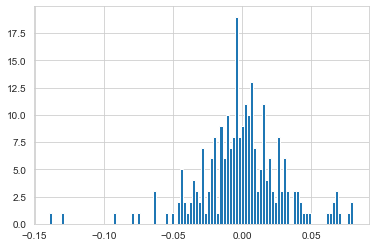

In [14]:
# only with histogram
globals()['APOLLOTYRE.NS']['Daily Return'].hist(bins=100)

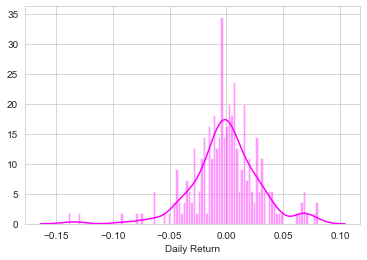

In [15]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(globals()['APOLLOTYRE.NS']['Daily Return'].dropna(), bins=100, color='magenta')

Now what if we wanted to analyze the returns of all the stocks in our list? For that, we need to build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame

closingprice_df = DataReader(tech_list, 'yahoo', start, end)['Close']

In [17]:
closingprice_df.head(10)

Symbols,APOLLOTYRE.NS,GLENMARK.NS,AARTIDRUGS.NS,ADANIGREEN.NS,RAMCOSYS.NS
Date,,,,,
2019-10-29,186.850006,309.149994,131.438004,89.500000,160.300003
2019-10-30,187.800003,309.700012,134.511993,89.900002,163.199997
2019-10-31,190.300003,315.399994,134.488007,89.699997,168.250000
2019-11-01,189.199997,315.750000,133.000000,89.949997,166.899994
2019-11-04,185.550003,316.149994,131.649994,92.650002,165.949997
2019-11-05,179.850006,317.100006,130.712006,90.699997,157.899994
2019-11-06,168.500000,301.299988,126.849998,90.300003,152.300003
2019-11-07,167.000000,293.850006,130.774994,88.699997,153.500000
2019-11-08,165.149994,286.450012,129.712006,86.699997,149.649994


In [18]:
# make a new tech returns DataFrame
tech_returns = closingprice_df.pct_change()

In [19]:
tech_returns.head()

Symbols,APOLLOTYRE.NS,GLENMARK.NS,AARTIDRUGS.NS,ADANIGREEN.NS,RAMCOSYS.NS
Date,,,,,
2019-10-29,NaN,NaN,NaN,NaN,NaN
2019-10-30,0.005084,0.001779,0.023387,0.004469,0.018091
2019-10-31,0.013312,0.018405,-0.000178,-0.002225,0.030944
2019-11-01,-0.005780,0.001110,-0.011064,0.002787,-0.008024
2019-11-04,-0.019292,0.001267,-0.010150,0.030017,-0.005692


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

So let's go ahead and compare Google and Amazon the same way.

Seaborn and Pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

C:\Users\DELL PC\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


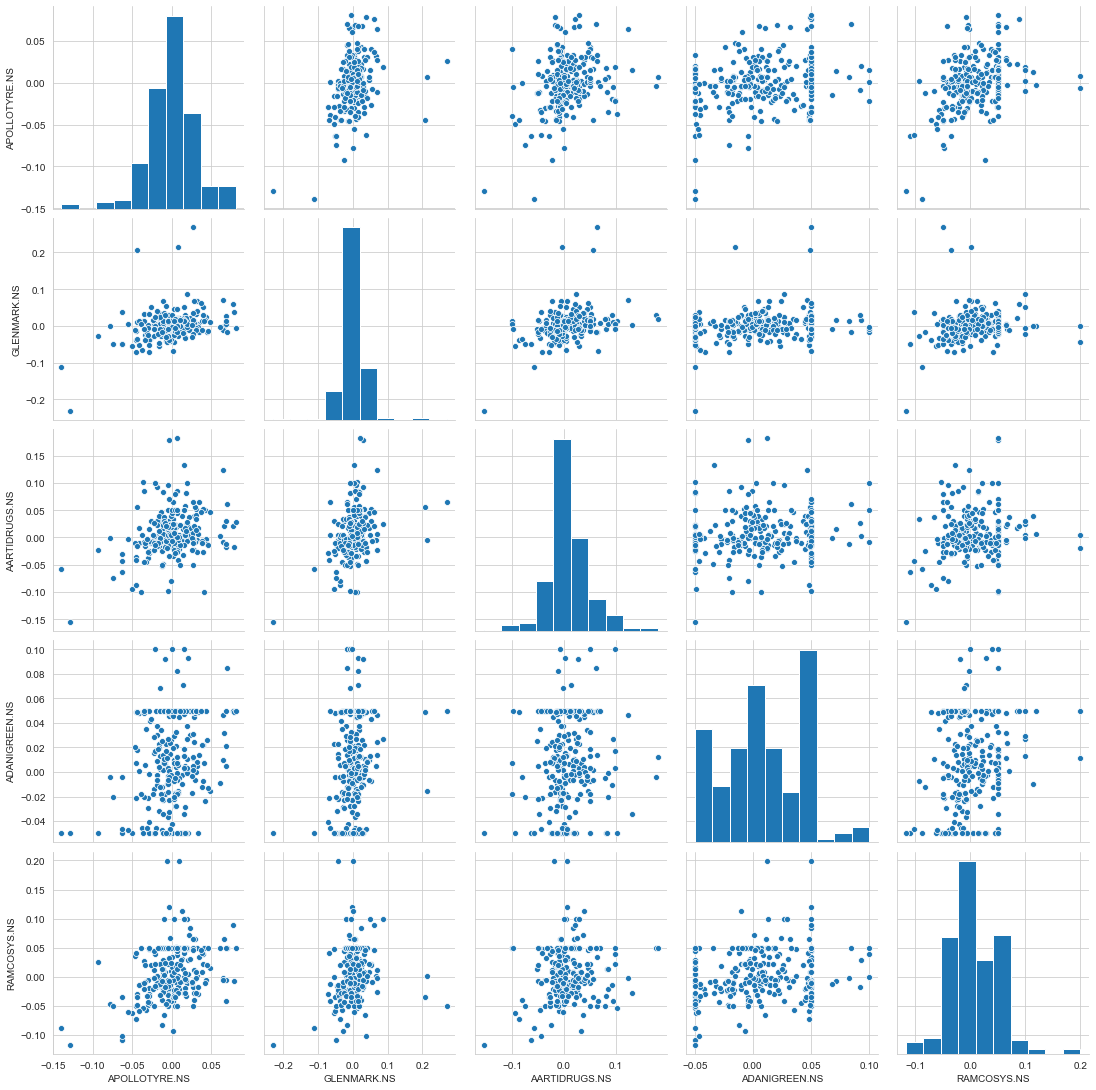

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_returns.dropna(),size=3)

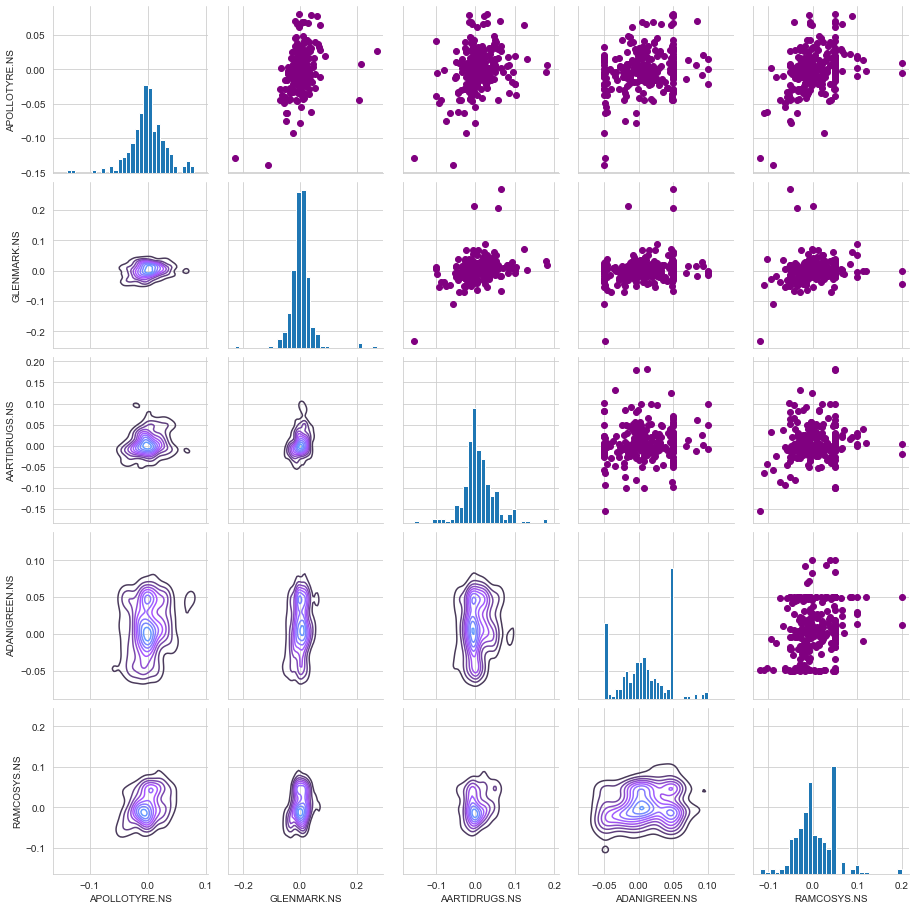

In [21]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We can also analyze the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

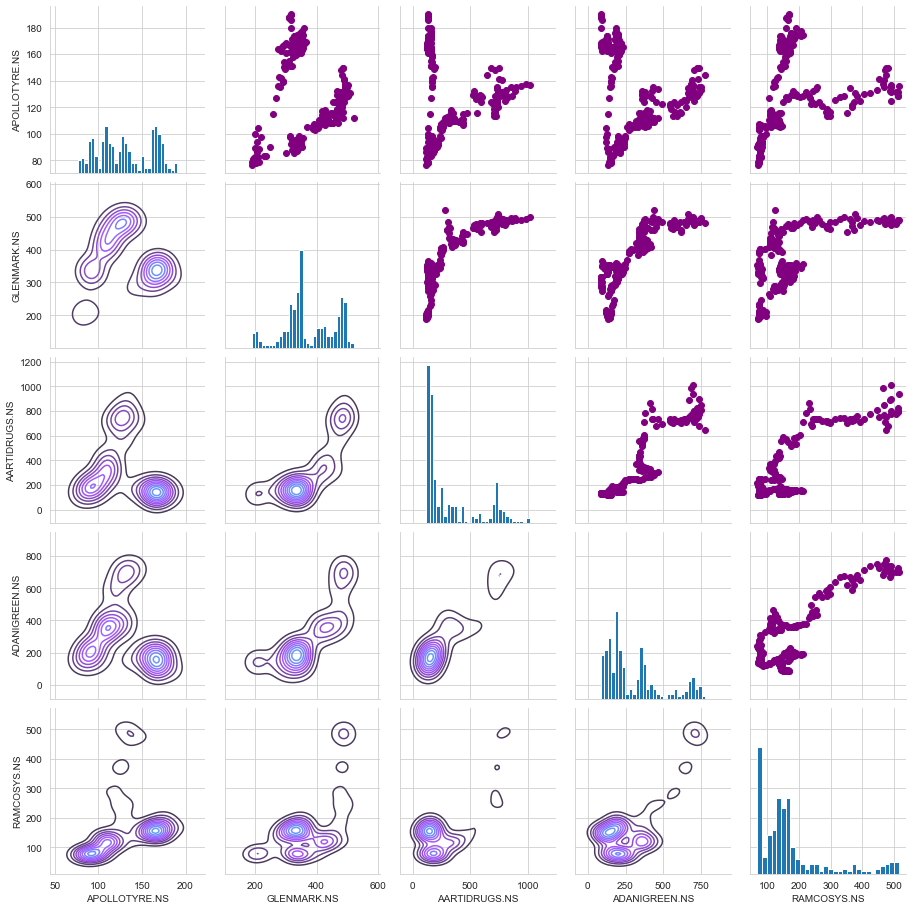

In [22]:
# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closingprice_df.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) & the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Google and Amazon stocks.

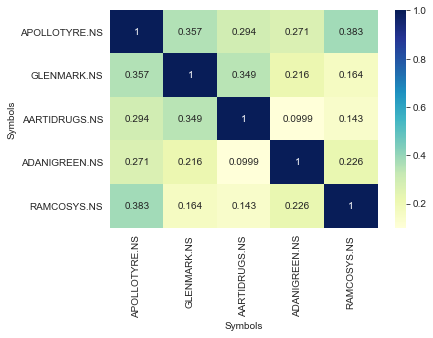

In [23]:
# Let's go ahead and use seaborn for a quick heatmap to get correlation for the daily return of the stocks.
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

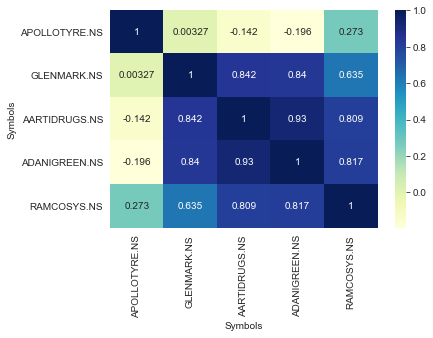

In [24]:
# Lets check out the correlation between closing prices of stocks
sns.heatmap(closingprice_df.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

# Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

In [25]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_returns DataFrame
rets = tech_returns.dropna()

In [26]:
rets.head()

Symbols,APOLLOTYRE.NS,GLENMARK.NS,AARTIDRUGS.NS,ADANIGREEN.NS,RAMCOSYS.NS
Date,,,,,
2019-10-30,0.005084,0.001779,0.023387,0.004469,0.018091
2019-10-31,0.013312,0.018405,-0.000178,-0.002225,0.030944
2019-11-01,-0.005780,0.001110,-0.011064,0.002787,-0.008024
2019-11-04,-0.019292,0.001267,-0.010150,0.030017,-0.005692
2019-11-05,-0.030719,0.003005,-0.007125,-0.021047,-0.048509


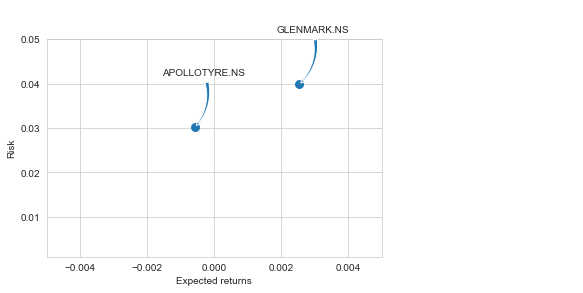

In [27]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.005,0.005])
plt.ylim([0.001,0.05])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have lower risk and positive expected returns.

### Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

Now we can use quantile to get the risk value for the stock.

In [28]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
rets["APOLLOTYRE.NS"].quantile(0.05)

-0.04482101039027005

The 0.05 empirical quantile of daily returns is at -0.038. That means that with 95% confidence, our worst daily loss will not exceed 1.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.038 * 1,000,000

In [29]:
# For AMZN stocks
rets["GLENMARK.NS"].quantile(0.05)

-0.04734075312262076

In [30]:
# For GOOGL stocks
rets["RAMCOSYS.NS"].quantile(0.05)

-0.05186014315332867

In [31]:
# For MSFT stocks
rets["ADANIGREEN.NS"].quantile(0.05)

-0.04988387565499766

## Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.



To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using in the Google stock DataFrame GOOGL


In [32]:
rets.head()

Symbols,APOLLOTYRE.NS,GLENMARK.NS,AARTIDRUGS.NS,ADANIGREEN.NS,RAMCOSYS.NS
Date,,,,,
2019-10-30,0.005084,0.001779,0.023387,0.004469,0.018091
2019-10-31,0.013312,0.018405,-0.000178,-0.002225,0.030944
2019-11-01,-0.005780,0.001110,-0.011064,0.002787,-0.008024
2019-11-04,-0.019292,0.001267,-0.010150,0.030017,-0.005692
2019-11-05,-0.030719,0.003005,-0.007125,-0.021047,-0.048509


In [33]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for GOOGL
mu = rets.mean()['APOLLOTYRE.NS']

# Now let's grab the volatility of the stock from the std() of the average return for GOOGL
sigma = rets.std()['APOLLOTYRE.NS']

Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [34]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Awesome! Now lets put above function to work.

In [35]:
# For Google Stock - GOOGL
globals()['RAMCOSYS.NS'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-29,164.850006,154.149994,157.000000,160.300003,11344,160.300003
2019-10-30,169.000000,160.199997,163.000000,163.199997,19371,163.199997
2019-10-31,192.449997,167.000000,185.250000,168.250000,800981,168.250000
2019-11-01,171.550003,165.250000,170.850006,166.899994,64687,166.899994
2019-11-04,172.000000,165.000000,168.000000,165.949997,39217,165.949997


Text(0.5, 1.0, 'Monte Carlo Analysis for RAMCOSYS.NS')

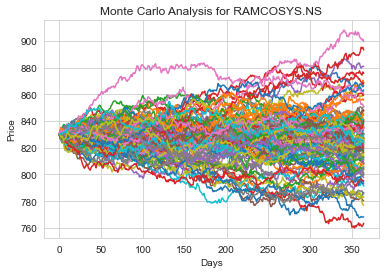

In [36]:
start_price = 830.09

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for RAMCOSYS.NS')

In [37]:
# For Amazon Stock - AMZN
globals()['GLENMARK.NS'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-29,315.049988,306.549988,313.600006,309.149994,1059344.0,307.603607
2019-10-30,316.649994,306.899994,309.200012,309.700012,1424761.0,308.150879
2019-10-31,319.000000,308.500000,308.500000,315.399994,1448084.0,313.822357
2019-11-01,321.799988,314.850006,317.000000,315.750000,1334886.0,314.170624
2019-11-04,322.950012,315.100006,318.000000,316.149994,812407.0,314.568604


Text(0.5, 1.0, 'Monte Carlo Analysis for GLENMARK.NS')

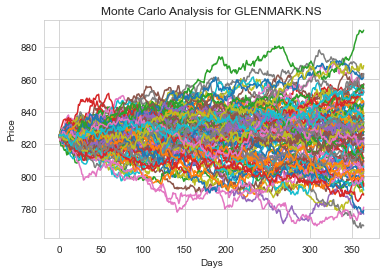

In [38]:
start_price = 824.95

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for GLENMARK.NS')

In [39]:
# For Apple Stock - AAPL
globals()['ADANIGREEN.NS'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-29,92.699997,87.099998,90.349998,89.500000,1977567,89.500000
2019-10-30,92.000000,89.500000,89.599998,89.900002,1188364,89.900002
2019-10-31,91.750000,88.599998,90.550003,89.699997,1051707,89.699997
2019-11-01,91.000000,88.099998,90.250000,89.949997,937093,89.949997
2019-11-04,95.849998,89.599998,89.699997,92.650002,3284998,92.650002


Text(0.5, 1.0, 'Monte Carlo Analysis for ADANIGREEN.NS')

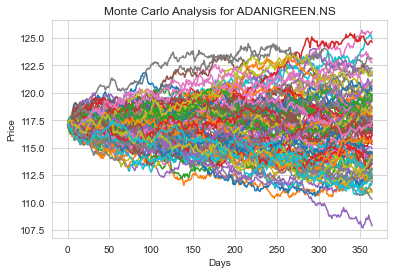

In [40]:
start_price = 117.10

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for ADANIGREEN.NS')

In [41]:
# For Microsoft Stock - MSFT
globals()['AARTIDRUGS.NS'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-29,132.500000,130.011993,132.500000,131.438004,59216.0,129.830322
2019-10-30,135.363007,130.000000,130.500000,134.511993,63124.0,132.866699
2019-10-31,138.949997,134.225006,134.238007,134.488007,58164.0,132.843018
2019-11-01,136.250000,132.250000,135.000000,133.000000,27116.0,131.373199
2019-11-04,135.287994,131.100006,135.250000,131.649994,32156.0,130.039719


Text(0.5, 1.0, 'Monte Carlo Analysis for AARTIDRUGS.NS')

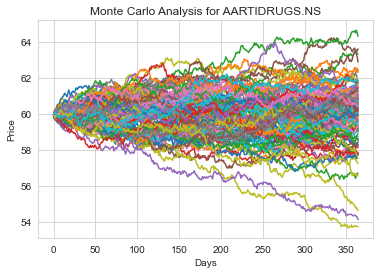

In [42]:
start_price = 59.94

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for AARTIDRUGS.NS')

In [43]:
# Lets start with Google stock price
start_price = 830.09

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

Text(0.5, 1.0, 'Final price distribution for APOLLOTYRES after 365 days')

C:\Users\DELL PC\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


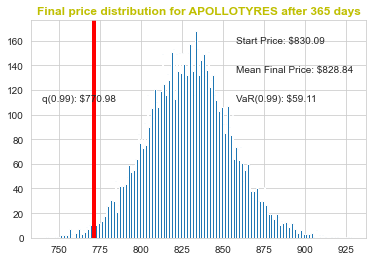

In [44]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for APOLLOTYRES after %s days" % days, weight='bold', color='Y')


##### Now lets plot remaining Stocks to estimate the VaR with our Monte Carlo Simulation.

In [45]:
# For Amazon Stock Price
start_price = 824.95

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for RAMCOSYS after 365 days')

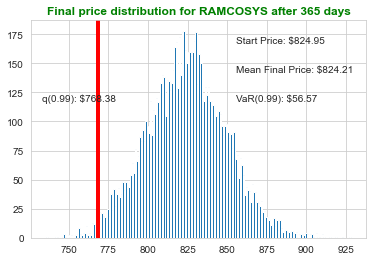

In [46]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for RAMCOSYS after %s days" % days, weight='bold', color='G')

In [47]:
# For Apple Stock Price
start_price = 117.10

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for AARTIDRUGS after 365 days')

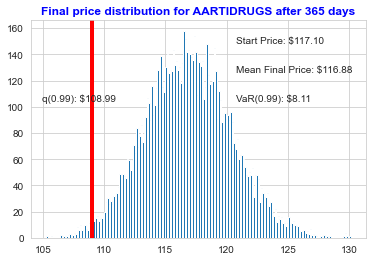

In [48]:

# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for AARTIDRUGS after %s days" % days, weight='bold', color='B')

In [49]:
# For Microsoft Stock Price
start_price = 59.94

# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for GLENMARK after 365 days')

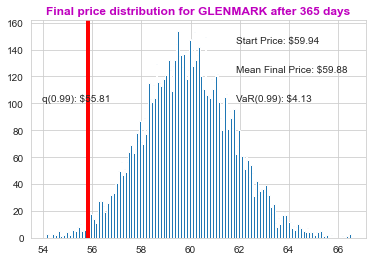

In [50]:
# Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations, bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# starting price
plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

# mean ending price
plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

# To display 1% quantile
plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# For plot title
plt.title("Final price distribution for GLENMARK after %s days" % days, weight='bold', color='M')